In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

# 1. Choice of likelihood

The Poisson distribution models the number of events that occur during an interval. The interval can be time, distance, area, etc. In this case, we are counting the number of cats per unit area.

# 2. Choice of prior

The rate parameter, $\lambda,$ of the Poisson distribution is a positive value so any distribution with support on the positive real numbers is a good start.

Something like the exponential distribution is not such a good choice because it has only 1 parameter and we can't adjust where to place most of the probability mass as well as the mode of the distribution.

The gamma distribution works.

# 3. Prior parameters

We want the mode of the distribution to be around 5. Note that the mode of the gamma distribution is at $(\alpha-1)/\beta$. We want 90% of the probability mass of the distribution to be between 0 and 10.

With some trial and error, we can find that $\alpha=5$ and $\beta=0.8$ is a good setting of the prior parameters.

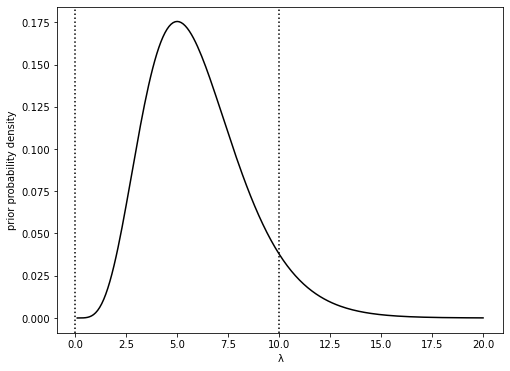

Integral between 0 and 10: 0.9999280530068562


In [2]:
alpha = 6
beta = 1
lambdas = np.linspace(0, 20, 201)[1:]
prior = sts.gamma(alpha, scale=1/beta).pdf(lambdas)
plt.figure(figsize=(8, 6))
plt.plot(lambdas, prior, color='black')
plt.axvline(0, color='black', linestyle=':')
plt.axvline(10, color='black', linestyle=':')
plt.xlabel('λ')
plt.ylabel('prior probability density')
plt.show()

print(
    'Integral between 0 and 10:',
    sp.integrate.trapz(prior, lambdas))

# 4. Posterior

We need to compute the likelihood of each value of $\lambda$.

The likelihood is not a probability distribution over $\lambda$ and does therefore not have to integrate to 1.

The posterior distribution is proportional to the prior multiplied by the likelihood. We need to make sure the posterior distribution is normalized by computing and dividing by the normalization constant.

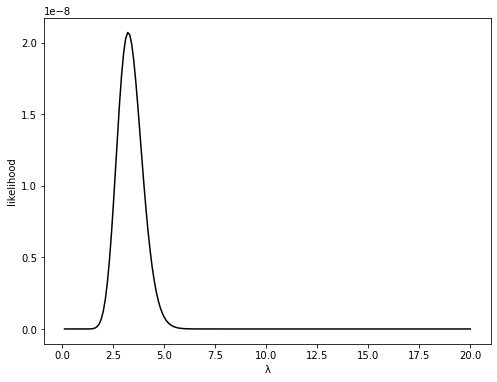

In [3]:
data = [3, 1, 2, 2, 2, 4, 3, 8, 4]

# For each lambda, compute the value of the likelihood function.
# It is the product over all data since the data are independent.
likelihood = [np.prod(sts.poisson.pmf(data, l)) for l in lambdas]

plt.figure(figsize=(8, 6))
plt.plot(lambdas, likelihood, color='black')
plt.xlabel('λ')
plt.ylabel('likelihood')
plt.show()

Normalization constant 3.678306065775663e-09


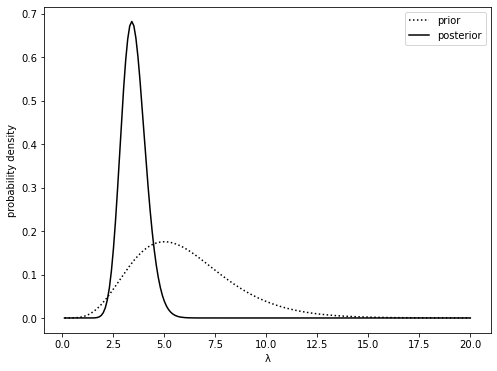

In [4]:
unnormalized_posterior = prior * likelihood

constant = sp.integrate.trapz(unnormalized_posterior, lambdas)
print('Normalization constant', constant)
posterior = unnormalized_posterior / constant

plt.figure(figsize=(8, 6))
plt.plot(lambdas, prior, color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, color='black', label='posterior')
plt.xlabel('λ')
plt.ylabel('probability density')
plt.legend()
plt.show()

# Mean and standard deviation

We can compute the mean and standard deviation using the same `trapz()` function to compute an approximate integral.

The mean is the expected value of $\lambda,$ $E[\lambda],$ the integral of $\lambda$ multiplied by the posterior pdf.

The standard deviation is the square root of the variance, which is $E[\lambda^2] - E[\lambda]^2.$

Posterior mean: 3.4999999999999996
Postrior standard deviation: 0.5916079783099643


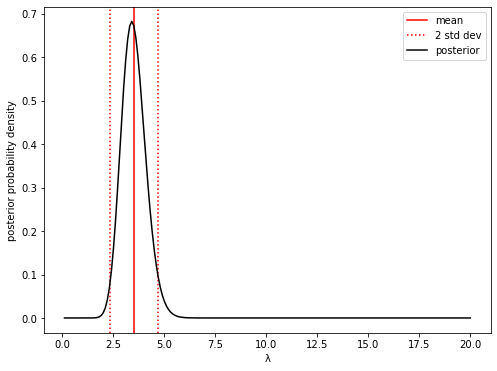

In [5]:
posterior_mean = sp.integrate.trapz(posterior * lambdas, lambdas)
posterior_std = (sp.integrate.trapz(posterior * lambdas**2, lambdas) - posterior_mean**2) ** 0.5

print('Posterior mean:', posterior_mean)
print('Postrior standard deviation:', posterior_std)

plt.figure(figsize=(8, 6))
plt.axvline(posterior_mean, color='red', label='mean')
plt.axvline(posterior_mean + 2*posterior_std, color='red', linestyle=':', label='2 std dev')
plt.axvline(posterior_mean - 2*posterior_std, color='red', linestyle=':')
plt.plot(lambdas, posterior, color='black', label='posterior')
plt.xlabel('λ')
plt.ylabel('posterior probability density')
plt.legend()
plt.show()